In [ ]:
import pandas as pd
def read_data(id):
    return pd.read_csv('https://drive.google.com/uc?export=download&id='+id_dict[id])

id_dict = {
    'sets': '1Dkd09FsucudaWVPkTHRV8Wx_GachJLI1',
    'inventories': '1CoBbtb0XuVcQLk_EqfeQKcfY8EuClOcg',
    'inventory_minifigs': '1e3eogAYpdz0-B_ccdVkfbwOVyNXOckn5',
    'minifigs': '1NOs2Lrxn4Kp-731q8dpBDZkzYpK6WuFm',
    'themes': '1y_RE8f-J91DQBA8qaP-xVlKb_ZZe8ky_',
}

sets_df = read_data('sets')
inventories_df = read_data('inventories')
inventory_minifigs_df = read_data('inventory_minifigs')
minifigs_df = read_data('minifigs')
themes_df = read_data('themes')

#### Exercise 1
Many `set_num` end with '-1'. Make a plot to show how many do and do not.

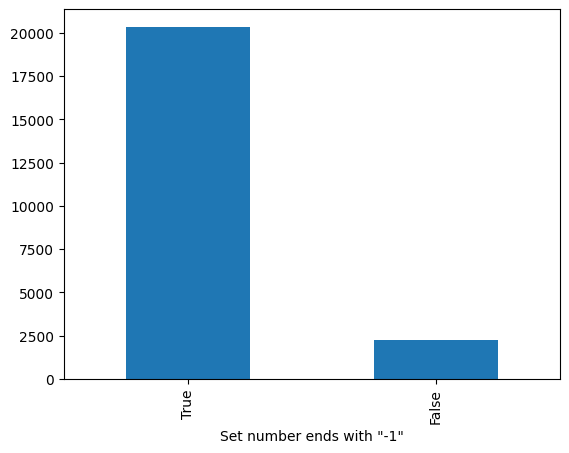

In [ ]:
# Your code here
sets_df.set_num.str.endswith('-1').value_counts().plot.bar(xlabel='Set number ends with "-1"');

#### Exercise 2
Plot the frequency of the 10 most popular themes. Color any theme containing the word "town" a different color.

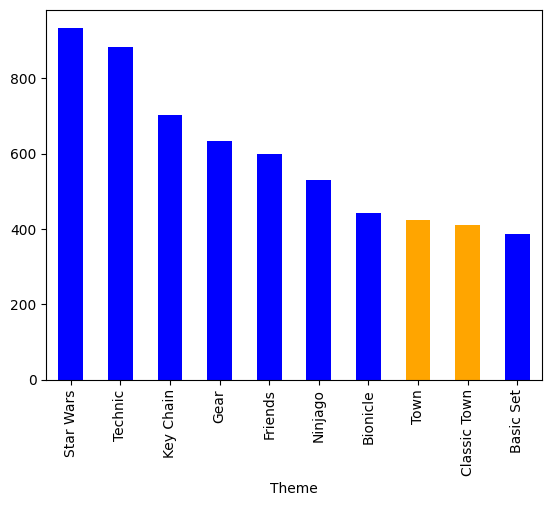

In [ ]:
# Your code here
biggest_themes = (
    sets_df
    .merge(themes_df, left_on='theme_id', right_on='id')
    .value_counts('name_y').nlargest(10)
)
biggest_themes.plot.bar(
    color=['orange' if 'Town' in set else 'blue' for set in biggest_themes.index],
    xlabel='Theme'
);

#### Exercise 3
Plot the number of sets released each year as a line plot.

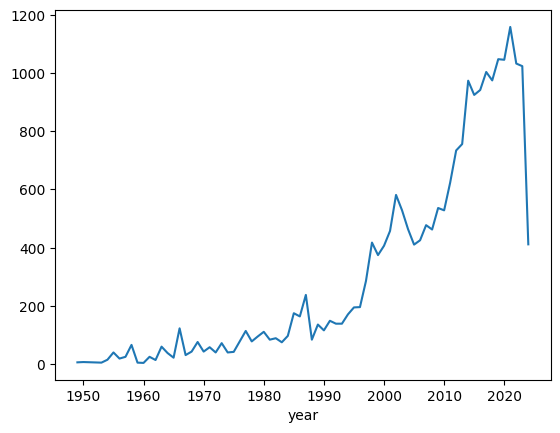

In [ ]:
# Your code here
sets_df.groupby('year').set_num.count().plot();

#### Exercise 4
Are LEGO sets getting more or less complicated over time? Plot the median number of parts per set over time.

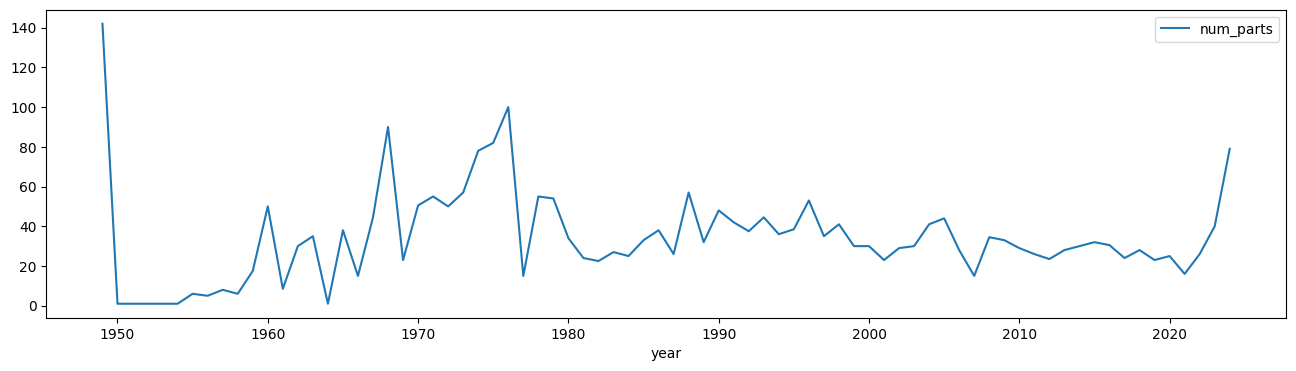

In [ ]:
# Your code here
(
    sets_df
    .groupby('year', as_index=False)
    ['num_parts'].median()
    .plot(kind='line',
          x='year',
          y='num_parts',
          figsize=(16,4)
          )
);

#### Exercise 5
Are minifigs popular? Make a box plot to show the number of minifigs per set by year.

>**Hint:** There are some extreme outliers here. You may wish to "zoom in" on the box plot to better understand the distributions. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to learn how to adjust the y-axis.

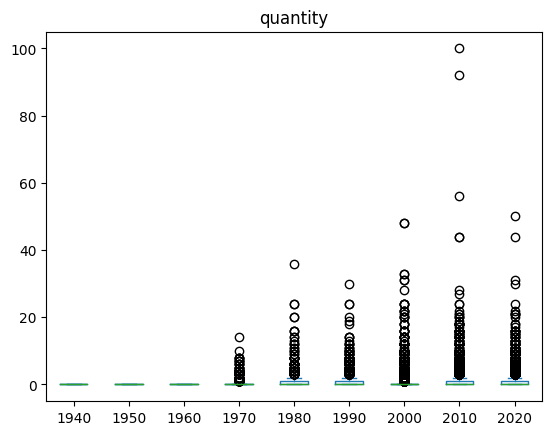

In [ ]:
# Your code here
(
    sets_df
    .merge(inventories_df)
    .merge(inventory_minifigs_df,
           how='left',
           left_on='id',
           right_on='inventory_id')
    .fillna(0)
    .assign(decade=lambda x:x.year//10*10)
    .groupby('set_num')
    .agg({'quantity': 'sum', 'decade':'first'})
    .plot(kind='box',
          column='quantity',
          by='decade',
        #   ylim=(0, 15)
          )
);